# 06 Operational Deflection Shapes (ODS)
The 3D display of the `pyFBS` can be used to animate objects. Animation can be performed on meshes directly on predefined objects (such as accelerometers). In this example an operational deflection shape of the a structure is animated. 

In [2]:
import pyFBS

import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Example Datasets
Load a predefined datasets from an example and add a structure from STL file to the 3D view.

In [3]:
pyFBS.download_automotive_testbench()

100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 7480.03it/s]

In [4]:
pos_xlsx = r"./automotive_testbench/Measurements/ODS.xlsx"

stl_rec = r"./automotive_testbench/STL/receiver.stl"
stl_tm = r"./automotive_testbench/STL/transmission_mount.stl"
stl_rm = r"./automotive_testbench/STL/roll_mount.stl"
stl_em = r"./automotive_testbench/STL/engine_mount.stl"
stl_ts = r"./automotive_testbench/STL/ts.stl"
stl_shaker = r"./automotive_testbench/STL/shaker_only.stl"

#### 3D view
Open 3D viewer in the background.

In [5]:
view3D = pyFBS.view3D()

Add a structure from STL file to the 3D view:

In [6]:
view3D.add_stl(stl_rec,name = "receiver_3",color = "#e0e0e0",opacity = .1)
view3D.add_stl(stl_tm,name = "transmission_mount_3",color = "#83afd2",opacity = .1)
view3D.add_stl(stl_rm,name = "roll_mount_3",color = "#83afd2",opacity = .1)
view3D.add_stl(stl_em,name = "engine_mount_3",color = "#83afd2",opacity = .1)
view3D.add_stl(stl_ts,name = "ts_3",color = "#FB6D4C",opacity = .1)
view3D.add_stl(stl_shaker,name = "shaker_only_3",color = "#FB6D4C",opacity = .1);

Add accelerometers to the 3D display:

In [7]:
df_acc = pd.read_excel(pos_xlsx, sheet_name='Sensors')

view3D.show_acc(df_acc,scale = 1000) # the units are in m, scale factor of 1000 is required

Add channels to the 3D display:

In [8]:
df_chn = pd.read_excel(pos_xlsx, sheet_name='Channels')

Add impacts to the 3D display:

In [9]:
df_imp = pd.read_excel(pos_xlsx, sheet_name='Impacts')

view3D.show_imp(df_imp,scale = 1000)
view3D.label_imp(df_imp,scale = 1000)

#### Experimental example
Load experimental data for the operational deflection shape animation

In [10]:
_file = r"./automotive_testbench/Measurements/ODS.p"
freq, Y_ODS = np.load(_file,allow_pickle = True)

Checkout a single FRF:

,Name,Description,Quantity,Grouping,Position_1,Position_2,Position_3,Direction_1,Direction_2,Direction_3
5,S2z,NaN,NaN,NaN,0.36,0.01,0.025,0.0,0.0,1.0


,Name,Description,Quantity,Grouping,Position_1,Position_2,Position_3,Direction_1,Direction_2,Direction_3
1,H2,-X,NaN,NaN,0.4,0.01,0.31,-1,0,0


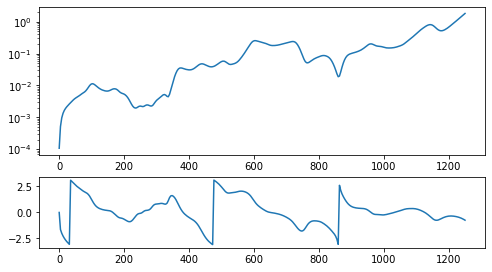

In [11]:
select_out = 5
select_in = 1

display(df_chn.iloc[[select_out]])
display(df_imp.iloc[[select_in]])

plt.figure(figsize = (8,6))
plt.subplot(211)
plt.semilogy(freq,np.abs(Y_ODS[:,select_out,select_in]))

plt.subplot(413)
plt.plot(freq,np.angle(Y_ODS[:,select_out,select_in]))

#### Accelerometer animation 
The objects placed in the 3D view can be simply animated. In this example an operational deflection shape at a certain impact position can be animated: 

In [12]:
freq_sel = -1
select_in = 6

emp_2 = pyFBS.orient_in_global(Y_ODS[freq_sel,:,select_in],df_chn,df_acc)

mode_dict = pyFBS.dict_animation(emp_2,"object",object_list = view3D.global_acc,r_scale=30)
mode_dict["freq"] = freq[freq_sel]
view3D.add_objects_animation(mode_dict,run_animation = True,add_note= True)

#### GIF export
The `pyFBS` supports also an export to a GIF file. Before running the animation just set the output directory `view3D.gif_dir` and set the variable `view3D.take_gif = True`. When the GIF is exporting the animation lags the animation can lag in the 3D display.

In [13]:
# view3D.take_gif = True
# view3D.gif_dir = "output.gif"

# view3D.add_objects_animation(mode_dict,run_animation = True,add_note= True)